### **Visualization of accident patterns in Kiel**
#### `Name & Surname: Abdulkadir Arslan`

I decided to use the Python packages that are in the following code cell, based on the content I created.

In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import altair as alt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

I used 'accidents.goejson' and 'districts.geojson' datasets to identify interesting patterns in the data. I provided a report with 4 different visualizations that visualize in different ways and describe these patterns based on the angles from which I looked at the data, including a map of Kiel that interactively visualizes the number of accidents per district. I also shortly performed IDA and EDA analysis before providing the visualizations.

In [21]:
accidents = gpd.read_file("accidents.geojson")
districts = gpd.read_file("districts.geojson")

#### **IDA (Initial Data Analys)**
##### The 'accidents.geojson' dataset has 6772 rows and 15 columns, there are various data types such as int64, object, and geometry. The 'districts.geojson' dataset has 30 rows and 4 columns, it has different data types such as int64, object, and geometry. For now, it seems that there are no missing values in either of the two datasets.
##### I also reviwed the each columns to understand what exactly these columns are about. 

In [22]:
print(f'\naccidents.geojson dataset: ')
accidents.head(1)
accidents.info()
print(f'\n\ndistricts.geojson dataset: ')
districts.head(1)
districts.info()


accidents.geojson dataset: 


,year,month,hour,weekday,harm_type,type1,type2,light_conditions,bike,car,pedestrian,motorcycle,truck,other,geometry
0,2016,January,7,Wednesday,Slightly Injured,Collision between vehicle and pedestrian,Accident caused by crossing the road,Twilight,0,1,1,0,0,0,POINT (573159.144 6018353.323)


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6772 entries, 0 to 6771
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   year              6772 non-null   int64   
 1   month             6772 non-null   object  
 2   hour              6772 non-null   int64   
 3   weekday           6772 non-null   object  
 4   harm_type         6772 non-null   object  
 5   type1             6772 non-null   object  
 6   type2             6772 non-null   object  
 7   light_conditions  1389 non-null   object  
 8   bike              6772 non-null   object  
 9   car               6772 non-null   object  
 10  pedestrian        6772 non-null   object  
 11  motorcycle        6772 non-null   object  
 12  truck             5729 non-null   object  
 13  other             6772 non-null   object  
 14  geometry          6772 non-null   geometry
dtypes: geometry(1), int64(2), object(12)
memory usage: 793.7+ KB


d

,osmid,name,wikidata,geometry
0,968220,Ravensberg,Q1301655,"POLYGON ((571612.381 6022507.828, 571637.678 6..."


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   osmid     30 non-null     int64   
 1   name      30 non-null     object  
 2   wikidata  28 non-null     object  
 3   geometry  30 non-null     geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 1.1+ KB


#### **EDA (Exploratory Data Analysis )**

##### I converted the following columns of "accidents_df" dataframe's data type from object to integer to be able to create the 'accident_number' column.
##### I created a new column called 'accident_number' in "accidents_df" dataframe to be able to have the total number of accidents per instance of the dataframe

In [23]:
accidents_df = accidents.copy()

columns_dtype_convert = ["bike", "car", "pedestrian", "motorcycle", "truck", "other"]
default_value = 0 

for column in columns_dtype_convert:
    accidents_df[column] = pd.to_numeric(accidents_df[column], errors='coerce').fillna(default_value).astype(int)

accidents_df['accident_number'] = accidents_df['bike'] + accidents_df['car'] + accidents_df['pedestrian'] + accidents_df['motorcycle'] + accidents_df['truck'] + accidents_df['other']
accidents_df.head(1)

,year,month,hour,weekday,harm_type,type1,type2,light_conditions,bike,car,pedestrian,motorcycle,truck,other,geometry,accident_number
0,2016,January,7,Wednesday,Slightly Injured,Collision between vehicle and pedestrian,Accident caused by crossing the road,Twilight,0,1,1,0,0,0,POINT (573159.144 6018353.323),2


##### I dropped the "osmid" and "wikidata" columns from "districts_df" dataframe because I do not need them for my further analysis.

In [24]:
districts_df = districts.copy()

districts_df = districts_df[["name", "geometry"]]
districts_df.rename(columns={'name': 'district_name'}, inplace=True)
districts_df.head(1)

,district_name,geometry
0,Ravensberg,"POLYGON ((571612.381 6022507.828, 571637.678 6..."


### **The First (1.) Visualization: A map of Kiel that interactively visualizes the number of accidents per district.**

##### I merged "accidents_df" and "districts_df" dataframes to surrond the accidents by polynoms(districts).

In [25]:
gdf_acc_dist = gpd.sjoin(accidents_df, districts_df, how='right', predicate='within')
gdf_acc_dist.head(1)

,index_left,year,month,hour,weekday,harm_type,type1,type2,light_conditions,bike,car,pedestrian,motorcycle,truck,other,accident_number,district_name,geometry
0,3132,2018,November,15,Monday,Slightly Injured,Collision with another vehicle moving laterall...,Accident involving stationary,None,0,0,0,1,0,1,2,Ravensberg,"POLYGON ((571612.381 6022507.828, 571637.678 6..."


##### I dissolved geometries into districts and aggreted(sum) the total number of the accidents in each district.

In [26]:
accidents_in_kiel_districts = gdf_acc_dist.dissolve(by='district_name', aggfunc={'accident_number': 'sum'})

##### I dropped the "geometry" column from "accidents_in_kiel_districts" dataframe and printed the first 5 districts that have the most of the accidents. I also

In [27]:
accidents_in_kiel_districts.drop(columns=['geometry']).sort_values('accident_number', ascending=False ).head().style

,accident_number
district_name,
Südfriedhof,1183
Gaarden-Ost,842
Schreventeich,829
Gaarden-Süd/Kronsburg,805
Wik,615


##### I created a new column called 'accident_percentage(%)' in the "accidents_in_kiel_districts" dataframe and wrote the necessary code to plot the map.

In [28]:
accidents_in_kiel_districts['accident_percentage(%)'] = accidents_in_kiel_districts['accident_number'] / accidents_in_kiel_districts['accident_number'].sum() * 100

accidents_in_kiel_districts.explore("accident_percentage(%)", cmap="viridis", legend=True)
plt.show()

#### **Description, Interpretation, Key Findings, and Recommendations of the First (1.) Visualization:**

##### Description:
-- It is a map of Kiel that interactively visualizes the number of accidents per district. Additionally, the occurred accident percentage info at each district according to the total accident number that occurred in Kiel is provided, too.

##### Interpretation & Key Findings:
-- The district where the accidents occurred the most is Südfriedhof and interestingly the respective neighboring districts, Gaarden-Ost, Schreventeich, Gaarden-Süd/Kronsburg, Wik, Ravensberg, and Hassee, share the rest of the highest ratio of accidents in Kiel. These all seven districts, which are located at the center of Kiel including Südfriedhof, constitute 52.24 percent of the total accidents that occurred in Kiel between 2016 and 2022. 

##### Recommendations:
-- Therefore, in this imaginary region which constitutes the majority of the occured accidents and consists of the seven districts needs to be examined detailed and specifically. There might be important comman reasons causing to have the majority of the occured accidents in these districts like high population, bad landforms, speed limits, inadequate roads lightining system, lack of daily police controls or bad layout of traffic lights/signs and etc.

### **The Second (2.) Visualization: Distribution of Accident Severity in Kiel & The Impact of Light Conditions on It**

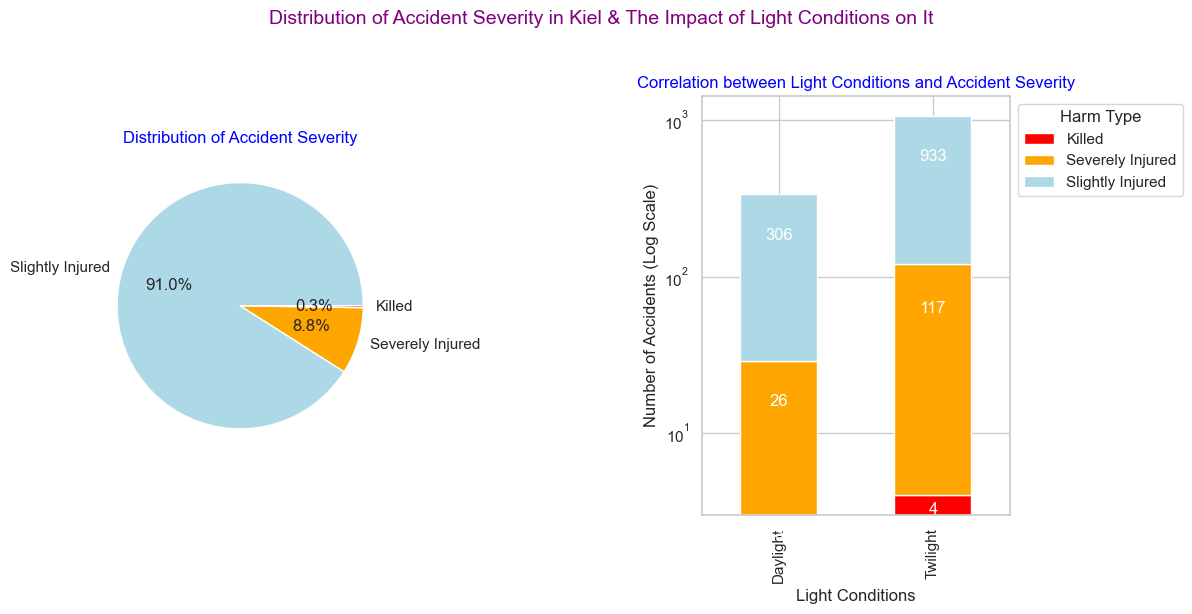

In [29]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(11, 6))

severity_distribution = accidents_df['harm_type'].value_counts()
colors = {'Slightly Injured': 'lightblue', 'Severely Injured': 'orange', 'Killed': 'red'}
severity_distribution.plot(kind='pie', autopct='%1.1f%%', ax=axes[0], colors=[colors[harm] for harm in severity_distribution.index])
axes[0].set_title('Distribution of Accident Severity', color = 'blue')
axes[0].set_ylabel('') 

light_harm_table = pd.crosstab(accidents_df['light_conditions'], accidents_df['harm_type'])
light_harm_table.plot(kind='bar', stacked=True, figsize=(12, 6), ax=axes[1], color=[colors[harm] for harm in light_harm_table.columns])

axes[1].set_yscale('log')

for i, (light_condition, row) in enumerate(light_harm_table.iterrows()):
    for j, value in enumerate(row):
        if light_harm_table.columns[j] == 'Killed':
            axes[1].text(i, sum(row[:j+1]) - 0.75, str(value), ha='center', va='center', color='white')
        else:
            axes[1].text(i, sum(row[:j+1]) - value/2, str(value), ha='center', va='center', color='white')


axes[1].legend(title='Harm Type', loc='upper left', bbox_to_anchor=(1, 1))

axes[1].set_title('Correlation between Light Conditions and Accident Severity', color = 'blue')
axes[1].set_xlabel('Light Conditions')
axes[1].set_ylabel('Number of Accidents (Log Scale)')

plt.suptitle('Distribution of Accident Severity in Kiel & The Impact of Light Conditions on It', fontsize=14, y=1.02, color='purple')

plt.tight_layout()
plt.subplots_adjust(wspace=1) 

plt.show();


#### **Description, Interpretation, Key Findings, and Recommendations of the Second (2.) Visualization:**

##### Description:
-- This visualization is created to give insights into accident severity distribution and affect of light conditions on the severity according to occur acidents in Kiel between 2016 and 2022. I included two different plots in one figure to be able to have key findings also related to light conditions.

##### Interpretation:
-- Thankfully, the 'Slightly Injured' severity type consitues a big majority of the accident severity with 91 percent. 'Severely Injured' type might seem as a small amount with 8.8 percent but it is an important portion when it comes to a human life. Only 0.3 percent of the accidents were deathly in past seven years and it is a significant success sign of the city administration, all responsible workers and drivers in Kiel.

-- However, ideally the main focus and the main goal is to achieve to diminish the number of the accidents and its severity to zero as much as possible. There might be some solutions to succed it by considering important affects such as light condition of the days of the week.

-- The big majority of severe accidents had been occurred during Twilight of the day as it can be seen explicitly. In addition, there is no accident ended up with death in the Daylight, only 4 accidents were deathly in Twighlight. The number of Slightly Injured type in Twighlight is a bit more than 3 times of the Daylight. The number of Severely Injured type in Daylight is almost one fifth of the Twighlight.

##### Key Findings: 
-- The obvious key point is that the dark part of the day is much more dangerous than the light part for drivers in Kiel. Of course, the light might not be the only reason that causes more severe accidents during Twighlight, however, we all know that the eyesight and the vision quality of human eyes are much less than the Daylight. Therefore, the Light Condition is a crucial affect on the disturibiton of Accident Severity so some basic preventions should be taken based on the Light Conditions of a day.

##### Recommendations:
-- First of all, the lighting system of the roads might need to be developed in terms of the number, maintenance, repair and renewal of lighting poles and the brightness level. The traffic signs have also an important role in the traffic, they might not been able to be seen by drivers in the dark roads if they are dirty or broken. It should not be forgotten that the traffic penalties are always big precautions for drivers even if we do not like them so increasing the number of mobile radars during Twighlight might be also a good approach to decrease the number of severe accidents.

### **The Third (3.) Visualization: Distribution of Accident Types and The Most Common Year of Their Occurrence**

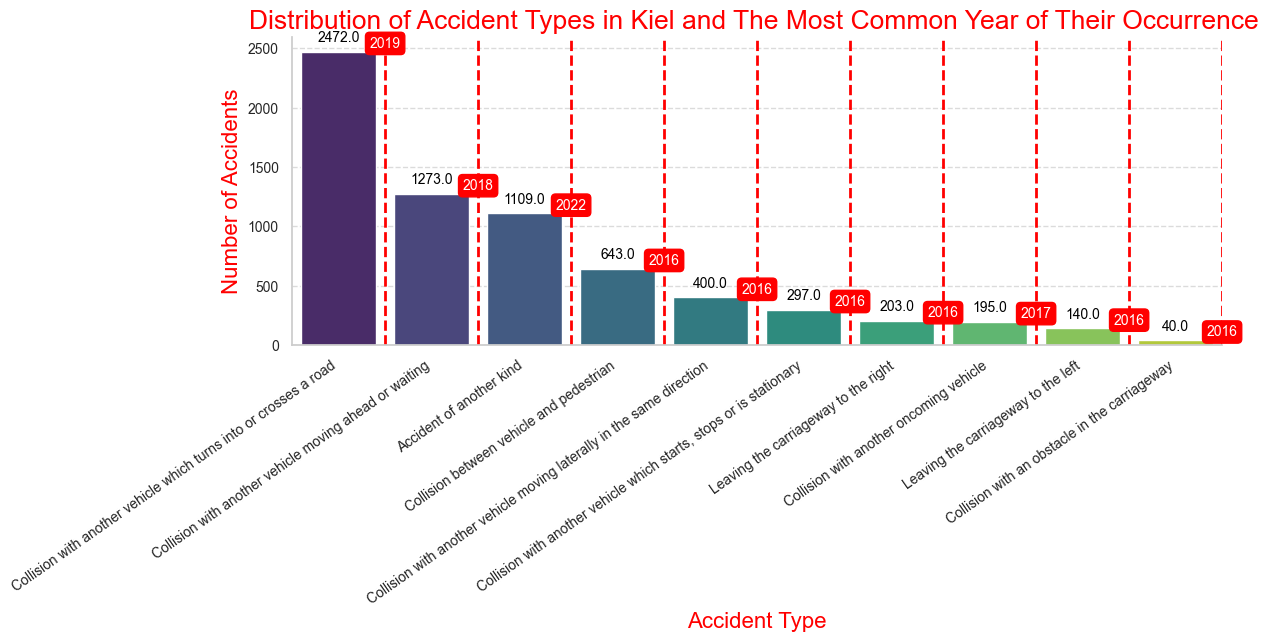

In [30]:
road_type_distribution = accidents_df['type1'].value_counts()

most_common_years = accidents_df.groupby('type1')['year'].agg(lambda x: x.value_counts().idxmax() if not x.empty else None)

colors = sns.color_palette("viridis", len(road_type_distribution))

plt.figure(figsize=(12, 4))
ax = sns.barplot(x=road_type_distribution.index, y=road_type_distribution.values, hue=road_type_distribution.index, palette=colors, legend=False)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

for type1, year in most_common_years.items():
    if year is not None:
        index = road_type_distribution.index.get_loc(type1) + 0.5
        plt.axvline(x=index, color='red', linestyle='--', linewidth=2)
        plt.text(index, road_type_distribution[type1] + 10, str(year), ha='center', va='bottom', color='white', fontsize=10,
                 bbox=dict(facecolor='red', edgecolor='red', boxstyle='round,pad=0.3'))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.title('Distribution of Accident Types in Kiel and The Most Common Year of Their Occurrence ', fontsize=19, color = 'red')
plt.xlabel('Accident Type', fontsize=16, color = 'red')
plt.ylabel('Number of Accidents', fontsize=16, color = 'red')
plt.xticks(rotation=35, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.show();

#### **Description, Interpretation and Key Findings of the Third (3.) Visualization:**

##### Description:
-- The main goal of this visualization is to see how the accident types are distributed in Kiel and give an idea about what type causes the accidents the most and, the most occured year of the accident type for each accident type between 2016 and 2022.

-- The aim of giving the most occurred year of an accident type info is to be able to investigate the type of mentioned accident reasons under similar conditions at the mentioned year. Because, the circumstances, conditions, rules, regulations, etc. are generally updated at the beginning or the end of each year.

##### Interpretation:
-- The most common accident type in Kiel is 'collision with another vehicle which turns into or crosses a road' and the most occured year of it is 2019.
The 'collision with an obstacle in the carriageway' type is the least common one and its most occured year is 2016. The number of the least common type is even much lower than the second least common type called 'leaving carriageway to the left'. The 'leaving carriageway to the left' type's most occurrence year is also 2016.

-- The 'accident of another kind', which we do not know the exact type, is just after the second most common accident type called 'collision with another vehicle moving ahead or waiting'. The 'accident of another kind' type's most occurrence year is 2022.  The 'collision between vehicle and pedestrian' accident type comes just after the 'accident of another kind' type and its occurrence number is a bit more than half of the 'accident of another kind' and it's most occurance year is 2016.

-- The 'collision with another vehicle moving laterally in the same direction' is the fifth most common accident type that comes just after the 'collision between vehicle and pedestrian' accident number. Its most occurrence year is 2016. 

-- The 'leaving the carriageway to the right', 'collision with another oncoming vehicle', and 'leaving the carriageway to the left' are respectively the sixth, seventh, and eighth most common accident types among all ten. Their most occurrence years are respectively 2016, 2016, and 2017.

##### Key Findings: 
-- Six of these ten accident types occurred the most in 2016 interestingly. There might be a specific reason why the year 2016 hosts various types of accidents the most and it is worthy to be examined.

-- The year 2019 might be considered as a plot year to be able to find what main reasons causing the 'collision with another vehicle which turns into or crosses a road' accident type which had occurred the most in Kiel.

-- The 'accident of another kind' accident type has a significant portion in the accident types distribution and it occurred the most in the last year.

-- There is not a specific trend in either 2020 or 2021 in terms of the most occurred accident types.

##### Recommendations:
-- Lots of recommendations can be given for each of the mentioned accident types because they are different from each other so the cause of formation of these accident types differ from each other.

-- My first recommendation would be to share this visual data with the public, especially with driving license courses and with current and future drivers to inform them and give them consciousness. Because most of the accidents are caused by the drivers, they should be aware of what types of accidents happening in their cities.

-- The best method might be to start with the nearest date and at the same time the most common types to be able to find the solutions for the main reasons for these accidents. Such as; 'collision with another vehicle which turns into or crosses a road', 'collision with another vehicle moving ahead or waiting',  'accident of another kind'. Therefore, my recommendations are going to be mainly on these three types of accidents occured in Kiel.

-- To be able to prevent collisions while vehicles turn into or cross a road and/or a street, primarily the main roads that have connections to many different streets or other roads should be considered and then the traffic lights and signs should be located at the entrance of these roads and streets, if there are already enough current traffic lights and signs, they should be optimized, maintained, and developed. Some streets and roads might need to be converted to one direction. Some traffic police or volunteers might be tasked physically on crowded roads at busy hours of the day.

Note: When I refer to a street I mean it is usually found in a city or town, and therefore often has houses or buildings on both sides, and narrower than the roadways.

-- There might be of course some other reasons but collision with another vehicle moving ahead or waiting is mostly caused by the following reasons; high speed, not maintaining a safe following distance, having phone calls, making conversations with other passengers, using mobile phones while driving, being sunk in something, driving while being drunk/tired/sleepy, wrong tires for the current season, vehicle brake maintenance, etc. So the reasons I provided are mainly related to the drivers as you can see. Therefore, in addition to my first recommendation above, some big penalties for drivers might be considered in these types of situations as well even though we do not like them.

-- The description and explanation of 'accident of another kind' accident type should be diversed, investigated, and specified in detail because it has a crucial role in the distribution and occurred the most in the near past so it can be repeated in the coming future.

### **The Fourth (4.) Visualization: Peak Time of the Accidents in Kiel by Weekday and Hour**

In [31]:
accidents_by_time = accidents_df.groupby(['weekday', 'hour']).size().reset_index(name='accident_count')

total_accidents_by_hour = accidents_df.groupby('hour').size().reset_index(name='total_accidents_hour')

accidents_by_time = accidents_by_time.merge(total_accidents_by_hour, on='hour')

total_accidents_by_weekday = accidents_df.groupby('weekday').size().reset_index(name='total_accidents_weekday')

accidents_by_time = accidents_by_time.merge(total_accidents_by_weekday, on='weekday')

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

heatmap = alt.Chart(accidents_by_time).mark_rect().encode(
    x=alt.X('hour:O', title='Hour of Day'),
    y=alt.Y('weekday:O', title='Day of Week', sort=weekday_order),
    color=alt.Color('accident_count:Q', scale=alt.Scale(scheme='inferno'), title='Accident Count'),
    tooltip=[
        alt.Tooltip('weekday:N', title='Day of Week'),
        alt.Tooltip('hour:N', title='Hour of Day'),
        alt.Tooltip('accident_count:Q', title='Accident Count'),
        alt.Tooltip('total_accidents_hour:Q', title='Total Accidents by Hour'),
        alt.Tooltip('total_accidents_weekday:Q', title='Total Accidents by Weekday')
    ]  
).properties(
    title='Peak Time of the Accidents in Kiel by Weekday and Hour',
    width=900,  
    height=400  
)

heatmap = heatmap.configure_title(fontSize=25, color='red')

heatmap = heatmap.configure_axis(
    labelFontSize=20,  
    titleFontSize=25,   
    titleColor='red'
)

heatmap


alt.Chart(...)

#### **Description, Interpretation and Key Findings of the Fourth (4.) Visualization:**

##### Description:
-- This interactive heatmap is made up for visualizing the peak time of the accidents in Kiel that occurred by weekday and hour. It provides the following information to users when they interact with the heatmap; day of week, hour of day, accident count for the selected day and hour, the total accidents by hour for the selected hour regardless of the selected day, and the total accidents by day for the selected day regardless of the selected hour.

##### Interpretation:
-- First, with a general look at the heatmap, a colorful, distinct but imaginary frame formed coincidently can give us a beneficial idea about the time of the accidents in Kiel.

-- Tuesday is the day when the accidents occurred the most, followed by respectively Monday, Wednesday, Thursday, Friday, Saturday, and Sunday even though there are small differences between the first five day inculiding Tuesday in the obtained order.

-- Regardless of the day of the week, the most common accident hour of the day is 16:00 with 588 total accidents, and then 17:00 (585), 15:00 (574), 14:00 (509), 13:00 (501), and 07:00 (505) hours come. Each of them had more than 500 accidents that occurred separately. There is no big difference between these 6 different hours of the day and 12:00 (463) and 18:00 (420).

-- Based on the combination of the day and the hour, the peak time of the accidents is on Monday at 07:00 with several 120 accidents. And then Wednesday-17:00, Tuesday-15:00, Tuesday-16:00, Monday-16:00, Thursday-17:00, Wednesday-07:00, Tuesday-07:00, Friday-13:00 come after the peak time with the repective accident numbers; 119, 114, 112, 111, 109, 107, 105, 105. 

-- Weekends had a much smaller number of accidents than the rest of the week.

##### Key Findings: 
-- According to the general look, even though it is not a narrow time span, the frame in the heatmap shows a big majority of the accidents occurred between 07:00 and 19:00 when considering a whole week.

-- The hours 15:00, 16:00, and 17:00 are the times that the accidents occur the most as I observed from the interpretation part. It is not surprising because these hours are generally when the work or lectures end.

-- Many of us have the Monday syndrome so it is harder to wake up and go to work or a lecture and a big percentage of people are reluctant. Being reluctant in the early hours generally affects almost everything we do the whole day and we become afocal on the things we are doing including driving. People also rush more on Mondays like there is no other day in the week to handle the stuff that they planned on the weekends or delayed in the previous week. So, these two main human psychology about Mondays make the traffic more risky. I strongly believe this is one of the main reasons why the peak time of the accidents is on Monday at 07:00. In addition, abruptly life in cities becomes much more alive on Mondays after the weekend so the roads are much more crowded than the other days so this might be also one of the main reasons. However, as I mentioned above that Tuesday is the day when the accidents occurred the most even though the peak time of the accidents is on Monday at 07:00 and it is a bit interseting.

-- Surprisingly, on Friday and Saturday nights, the number of accidents is much less than the other times of the day, even though people entertain and consume more alcoholic drinks at these times. It shows that either drivers in Kiel are conscious about not driving their vehicles when they are drunk or there is not a busy nightlife in the city. The Note I provided in the following paragraph supports the general knowledge about Friday and Saturday nights.

Note: A statistic called [Crashes by Time of Day and Day of Week](https://injuryfacts.nsc.org/motor-vehicle/overview/crashes-by-time-of-day-and-day-of-week/) provided in 2021 by injuryfacts.nsc.org proves that on average in 2021, fatal car crashes were more frequent on weekends, peaking on Saturdays. The number of nonfatal crashes tended to be higher on weekdays, peaking on Friday.

##### Recommendations:
-- The number of staff, who work in the field of city traffic, might need to be increased to work in various locations mostly between 07:00 and 19:00, more than other times during the day, concerning the consideration of the obtained colorful frame on the heatmap. The blinking time of green and red traffic lights might need to be rearranged during the mentioned period. More detailed and descriptive traffic signs or some extra components might need to be included for this special time span.

-- The schools', universities', or other educational courses' schedules might need to be reset or updated to distinguish them from the work schedules. So that they do not come across at the times that the accidents occur the most like at 15:00, 16:00, and 17:00. Also it might be a solution for parents who might have to drive faster to pick their kids up from school after work and try to be on time.

-- To decrease the traffic and risk, especially on Mondays, personal vehicle driving might need to be restricted, and people can be advised to use public transportation, bicycles, or company shuttles. In addition, the workloads might also need to be limited, or opening hours should be later than usual opening hours at banks, governmental offices, grocery markets, etc so that people do not only consider Monday to do their things and can spread on the rest of the working days of the week.